# Contingency table and bar plot

## Import data

In [1]:
import pandas as pd

ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "loans.csv"

df = pd.read_csv(ROOT + DATA)

## Data overview

In [3]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,mortgage,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,rent,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,rent,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,rent,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,rent,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,rent,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,mortgage,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,mortgage,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,mortgage,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [6]:
# Show dataframe for our two variables
df[["homeownership", "application_type"]]

,homeownership,application_type
0,mortgage,individual
1,rent,individual
2,rent,individual
3,rent,individual
4,rent,joint
...,...,...
9995,rent,individual
9996,mortgage,individual
9997,mortgage,joint
9998,mortgage,individual


In [7]:
# Show info about variables
df[["homeownership", "application_type"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   homeownership     10000 non-null  object
 1   application_type  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [10]:
# Change data format from object to category
df['homeownership'] = df['homeownership'].astype("category")

In [ ]:
# You can also select variables with df.
df.application_type = df.application_type.astype("category")

In [11]:
# Show info
df[["homeownership", "application_type"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   homeownership     10000 non-null  category
 1   application_type  10000 non-null  category
dtypes: category(2)
memory usage: 19.9 KB


In [17]:
# Show levels of categorical variable
df['homeownership'].cat.categories

Index(['mortgage', 'own', 'rent'], dtype='object')

In [19]:
# Show levels of categorical variable
df.application_type.cat.categories

Index(['individual', 'joint'], dtype='object')

In [20]:
# Summarizing the frequencies for each value
df["homeownership"].value_counts()

mortgage    4789
rent        3858
own         1353
Name: homeownership, dtype: int64

In [21]:
# Summarizing the frequencies for each value
df.application_type.value_counts()

individual    8505
joint         1495
Name: application_type, dtype: int64

## Contingency table

In [8]:
# contingency table for application type and homeownership.
pd.crosstab(df.application_type	, df.homeownership,  margins=False)

homeownership,mortgage,own,rent
application_type,,,
individual,3839,1170,3496
joint,950,183,362


In [9]:
# contingency table for application type and homeownership.
pd.crosstab(df.application_type	, df.homeownership,  margins=True)

homeownership,mortgage,own,rent,All
application_type,,,,
individual,3839,1170,3496,8505
joint,950,183,362,1495
All,4789,1353,3858,10000


## Bar plot

In [10]:
%matplotlib inline
import seaborn as sns
# customize seaborn plot settings
sns.set_theme(style="ticks", color_codes=True)

## Standard bar plot

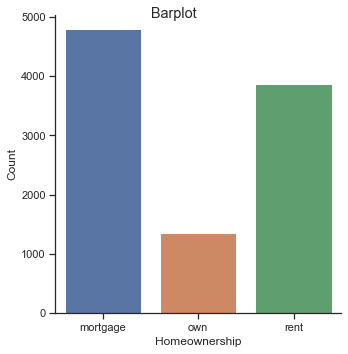

In [11]:
# Count plot of the homeownership variable.
g = sns.catplot(x="homeownership",
            kind = "count",
            data=df)

# Add title
g.fig.suptitle('Barplot')
# Add custom axis labels
g.set_axis_labels("Homeownership", "Count");

## Customized bar plot

Use own your own colors and sort values.

In [12]:
# my own colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"

# make a list
colors_blue = [blue_dark, blue, blue_light]

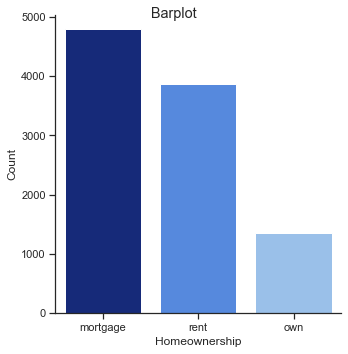

In [15]:
g = sns.catplot(x="homeownership",
            kind = "count",
            palette=colors_blue,
            data=df,
            order=df.value_counts('homeownership').index
            )

# Add title
g.fig.suptitle('Barplot')
# Add custom axis labels
g.set_axis_labels("Homeownership", "Count");